# Import the Liabraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [39]:
data = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\Machine Learning Projects\20 Big mart sales data\Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
data.shape

(8523, 12)

 # Data Cleaning

In [41]:
data = data.dropna(subset=["Outlet_Size"])
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [43]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.898675,0.064505,141.256859,1995.794373,2322.688445
std,4.073760,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.898675,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data visualization

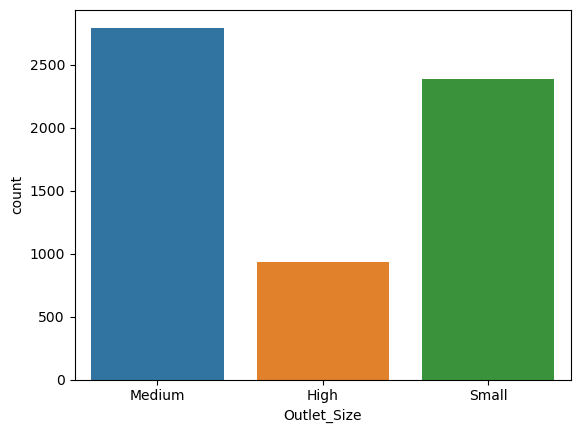

In [52]:
sns.countplot(x = data['Outlet_Size'] , hue= data['Outlet_Size'])
plt.show()

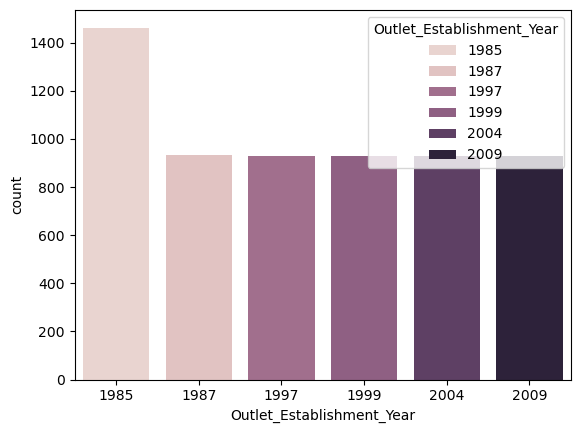

In [54]:
sns.countplot(x = data["Outlet_Establishment_Year"] , hue = data["Outlet_Establishment_Year"])
plt.show()

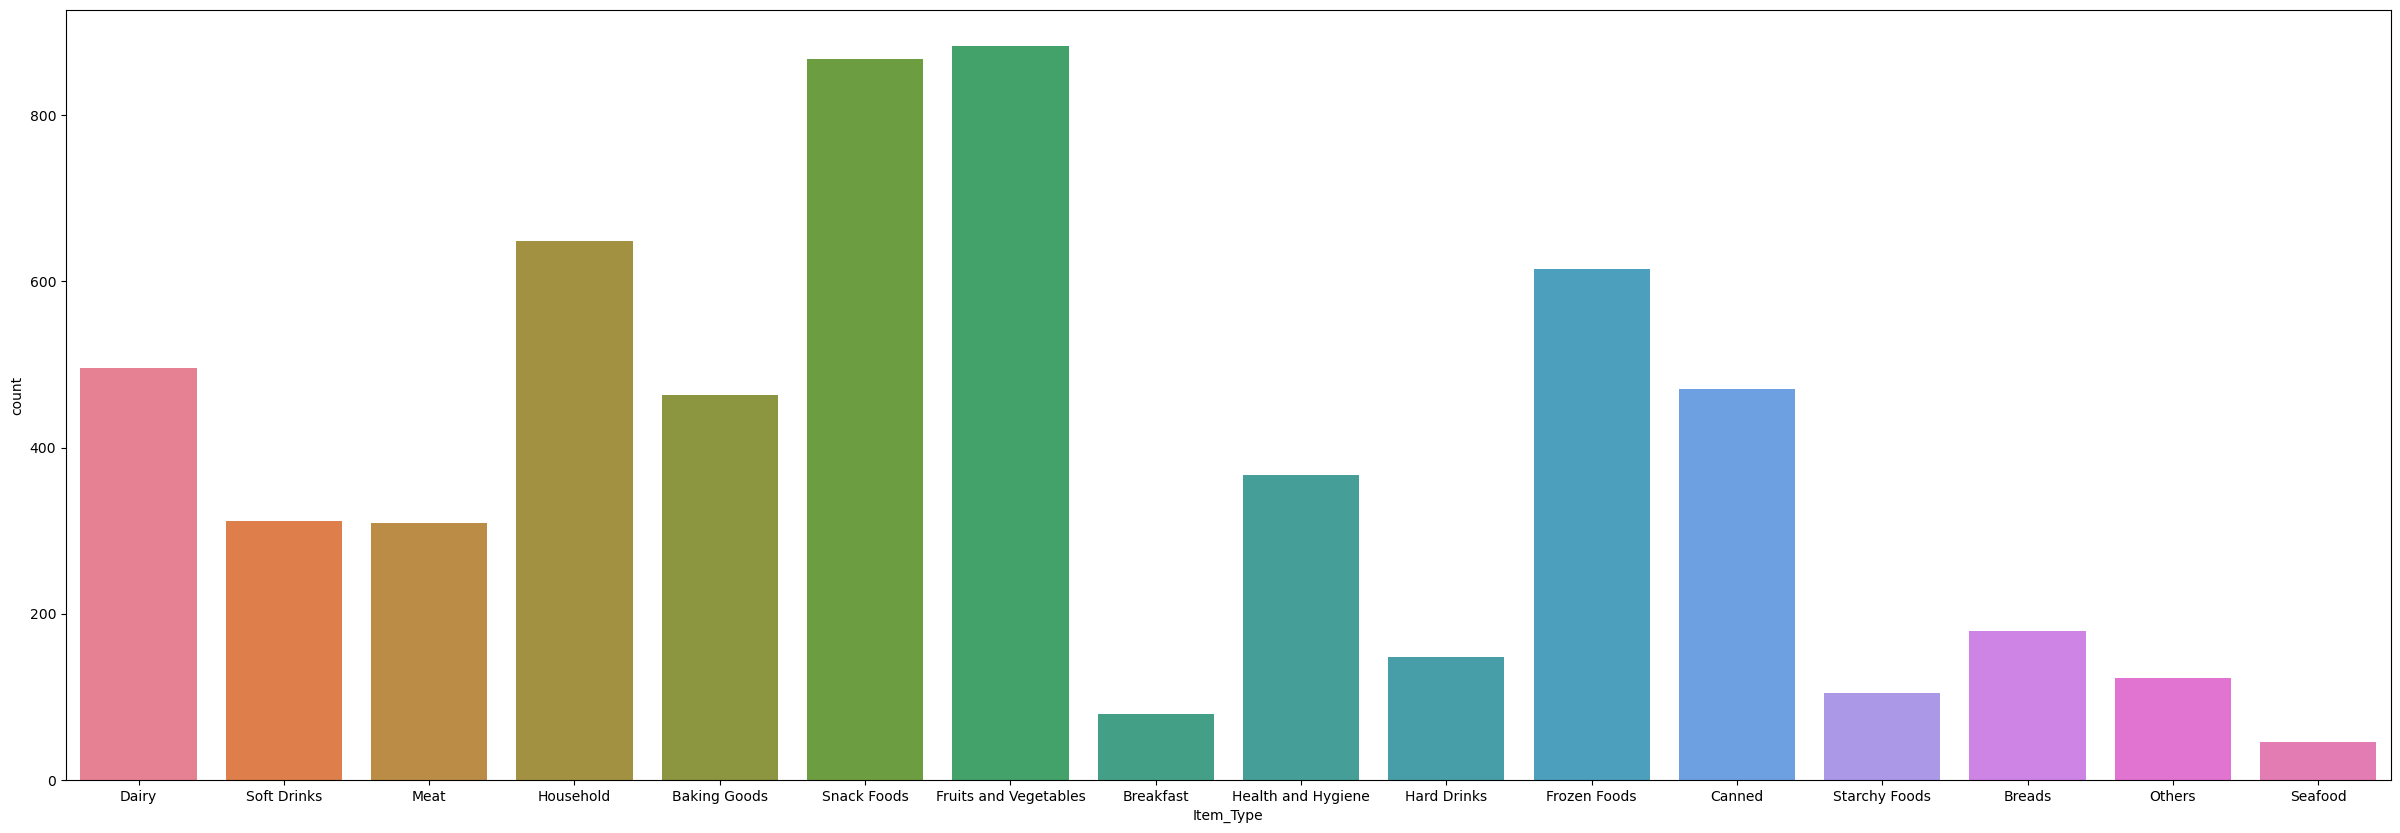

In [60]:
plt.figure(figsize=(30,10))
sns.countplot(x = data["Item_Type" ], hue = data["Item_Type"])
plt.show()

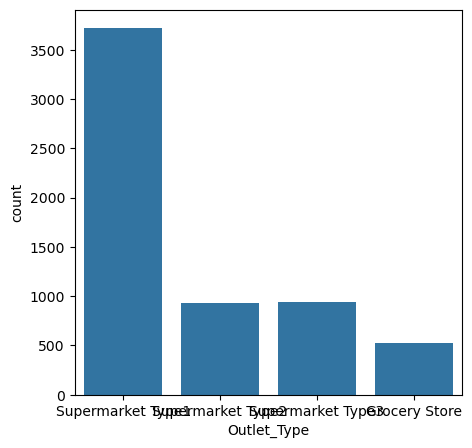

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x = data["Outlet_Type"] )
plt.show()

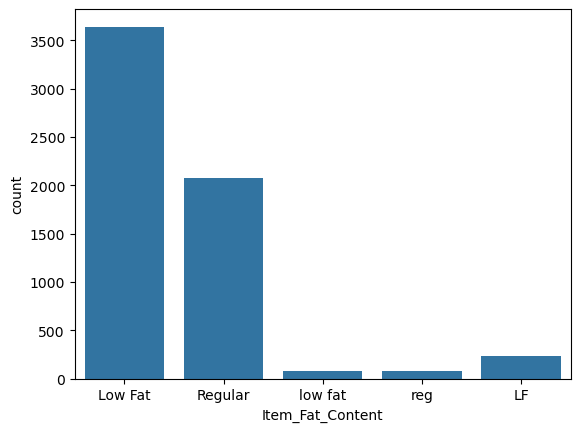

In [64]:
sns.countplot(x = data["Item_Fat_Content"])
plt.show()

In [20]:
x = data.drop(columns=["Item_Outlet_Sales"])
y = data["Item_Outlet_Sales"]

# Encode our data

In [67]:
LE = LabelEncoder()

In [68]:
for col in x.columns:
    x[col] = LE.fit_transform(x[col])

In [23]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,155,279,1,494,4,4427,6,3,1,0,1
1,8,56,2,646,14,371,1,5,1,2,2
2,661,370,1,526,10,2300,6,3,1,0,1
4,1294,261,1,0,9,487,0,1,0,2,1
5,757,291,2,0,0,439,1,5,1,2,2


# Trained Our Data

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [25]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(4890, 11) (1223, 11) (4890,) (1223,)


In [35]:
model = XGBRegressor(n_estimators  = 7)

In [36]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=7,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
print(model.score(x_train,y_train))
print(model.score(x_test , y_test))

0.6404297792540325
0.5775653188191769


In [69]:
input_data = (155, 279, 1, 494, 4, 4427, 6, 3, 1, 0, 1)
arrayed_data  = np.asarray(input_data)
reshaped_data = arrayed_data.reshape(1,-1)
prediction  = model.predict(reshaped_data)
print(prediction)

[4014.5107]


In [78]:
prediction_data = model.predict(x_train)

C:\Users\ma516\AppData\Local\Temp\ipykernel_5608\726135801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = prediction_data)


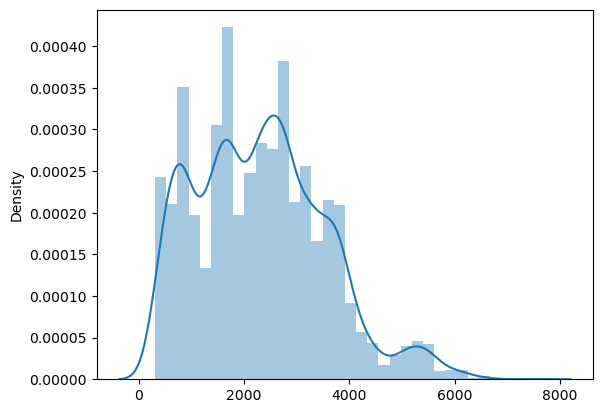

In [79]:
sns.distplot(x = prediction_data)
plt.show()

C:\Users\ma516\AppData\Local\Temp\ipykernel_5608\897038251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data["Item_Outlet_Sales"])


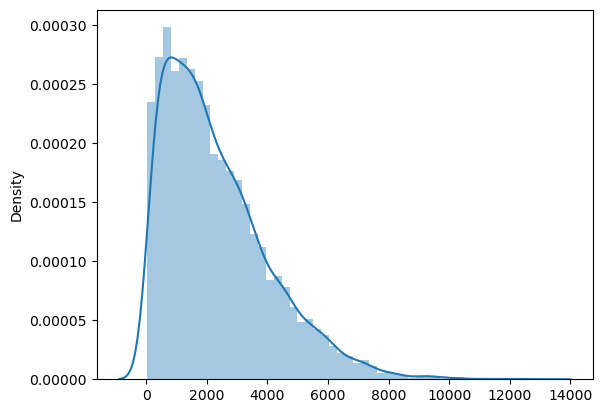

In [80]:
sns.distplot(x = data["Item_Outlet_Sales"])
plt.show()